In [0]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
import numpy as np
import os
import pandas as pd
import seaborn as sns
from keras.applications import mobilenet_v2
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

#--
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools

#---
# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
start = dt.datetime.now()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
root_path = 'drive/My Drive/Thesis_data/image_dir/'
print(root_path)

drive/My Drive/Thesis_data/image_dir/


In [0]:
!unzip '/content/drive/My Drive/Thesis_data/image_dir/rocole_coffee_images.zip'

Archive:  /content/drive/My Drive/Thesis_data/image_dir/rocole_coffee_images.zip
replace test/C10P10E1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/C10P10E1.jpg       
  inflating: test/C10P10E2.jpg       
  inflating: test/C10P10H1.jpg       
  inflating: test/C10P10H2.jpg       
  inflating: test/C10P11E1.jpg       
  inflating: test/C10P11E2.jpg       
  inflating: test/C10P11H1.jpg       
  inflating: test/C10P11H2.jpg       
  inflating: test/C10P12E1.jpg       
  inflating: test/C10P12E2.jpg       
  inflating: test/C10P12H1.jpg       
  inflating: test/C10P12H2.jpg       
  inflating: test/C10P13E1.jpg       
  inflating: test/C10P13E2.jpg       
  inflating: test/C10P13H1.jpg       
  inflating: test/C10P13H2.jpg       
  inflating: test/C10P14E1.jpg       
  inflating: test/C10P14E2.jpg       
  inflating: test/C10P14H1.jpg       
  inflating: test/C10P14H2.jpg       
  inflating: test/C10P15E1.jpg       
  inflating: test/C10P15E2.jpg       
  inflating: tes

In [0]:
%%shell

#rm -rf _MACOSX

In [0]:
#%%shell
#mv *.json keras-pretrained-model

In [0]:
#!ls keras-pretrained-model

In [0]:
#!cp /content/keras-pretrained-model/xc* ~/.keras/models/

In [0]:
%%shell
#mkdir input
#mkdir /content/input/plant-seedlings-classification
#mv test /content/input/plant-seedlings-classification
#mv train /content/input/plant-seedlings-classification

#cp '/content/drive/My Drive/Thesis_data/sample_submission.csv' /content/input/plant-seedlings-classification/
cp '/content/drive/My Drive/Thesis_data/image_dir/simple_submisson1.csv' /content/

In [0]:
SAMPLE_PER_CATEGORY = 200
SEED = 1987
data_dir = '/content/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
sample_submission = pd.read_csv(os.path.join(data_dir, 'simple_submisson1.csv'))

In [0]:
#The mofified
#scale = 70
#path_to_images = '/content/train/*/*.jpg'
#images = glob(path_to_images)
#trainingset = []
#traininglabels = []
#num = len(images)
#count = 1
#READING IMAGES AND RESIZING THEM
#for i in images:
 #   print(str(count)+'/'+str(num),end='\r')
#    trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
 #   traininglabels.append(i.split('/')[-2])
 #   count=count+1
#trainingset = np.asarray(trainingset)
#traininglabels = pd.DataFrame(traininglabels)

#Cleaning the images and removing the background:

Cleaning of the images is an intensive task. We will have to:
Convert the RGB image into HSV.
We will have to blur the image to remove noise.
We will have to create a mask to remove the background.

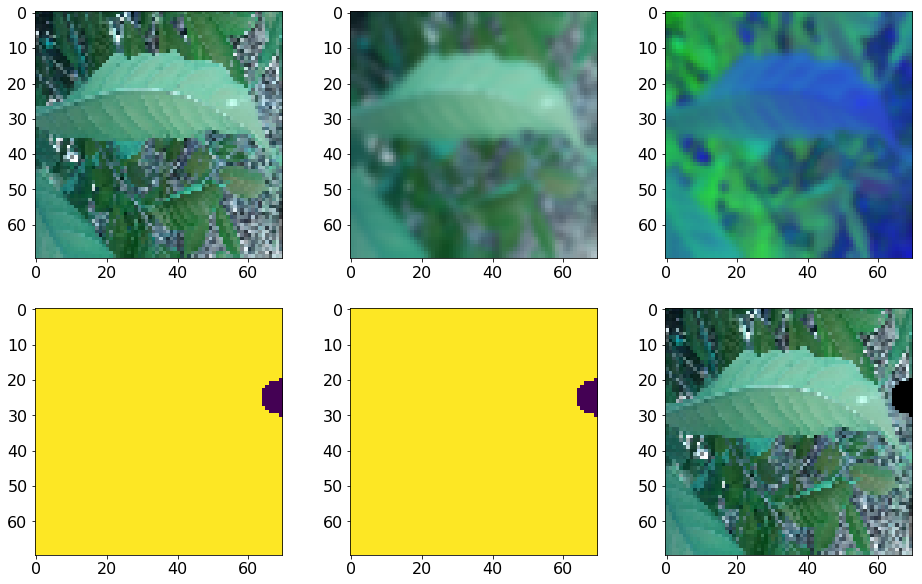

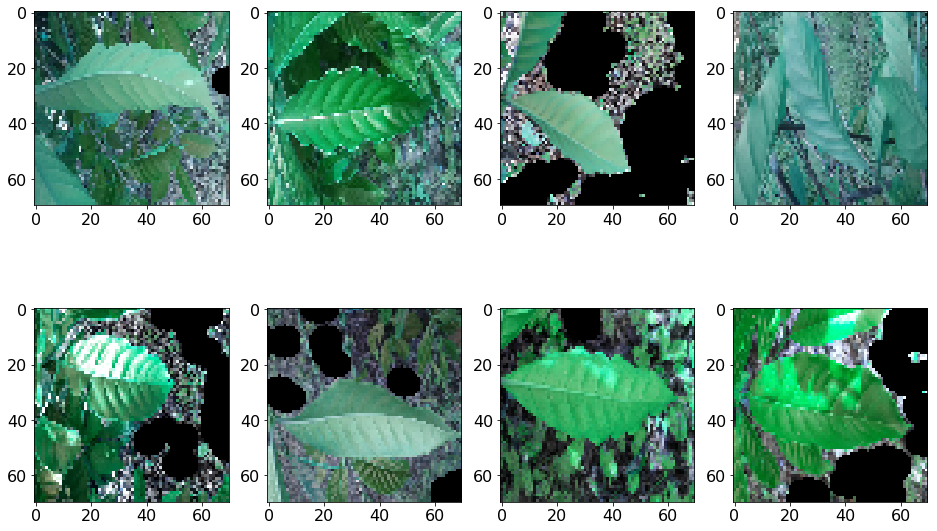

In [0]:
#new_train = []
#sets = []; getEx = True
#for i in trainingset:
#    blurr = cv2.GaussianBlur(i,(5,5),0)
#    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
#    #GREEN PARAMETERS
#    lower = (25,40,50)
#    upper = (75,255,255)
#    mask = cv2.inRange(hsv,lower,upper)
 #   struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
#    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
#    boolean = mask>0
#    new = np.zeros_like(i,np.uint8)
 #   new[boolean] = i[boolean]
#    new_train.append(new)
    
#    if getEx:
#        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
#        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
#        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
#        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
#        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
#        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
#        plt.show()
#        getEx = False
#new_train = np.asarray(new_train)

# CLEANED IMAGES
#for i in range(8):
#   plt.subplot(2,4,i+1)
#    plt.imshow(new_train[i])

LabelEncoder()

Classes['healthy' 'red_spider_mite' 'rust_level_1' 'rust_level_2' 'rust_level_3'
 'rust_level_4']
6


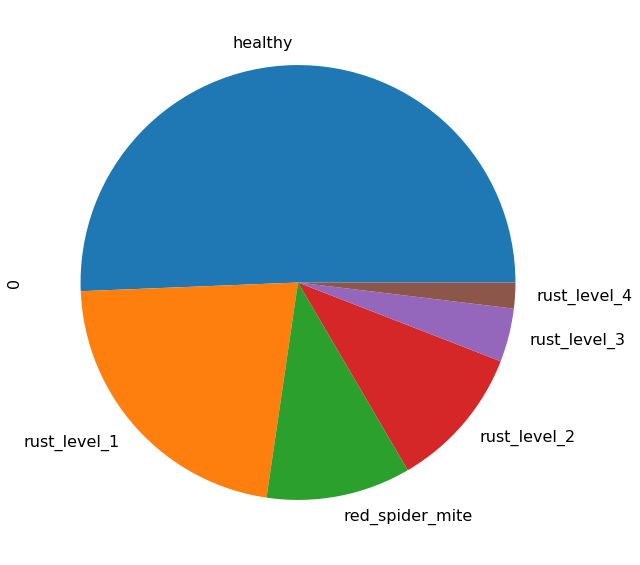

In [0]:
#labels = preprocessing.LabelEncoder()
#labels.fit(traininglabels[0])
#print('Classes'+str(labels.classes_))
#encodedlabels = labels.transform(traininglabels[0])
#clearalllabels = np_utils.to_categorical(encodedlabels)
#classes = clearalllabels.shape[1]
#print(str(classes))
#traininglabels[0].value_counts().plot(kind='pie')

In [0]:
#seed = 7
#new_train = new_train/255
#x_train,x_test,y_train,y_test = train_test_split(new_train,clearalllabels,test_size=0.1,random_state=seed,stratify=clearalllabels)

In [0]:
CATEGORIES = ['healthy','red_spider_mite', 'rust_level_1', 'rust_level_2', 'rust_level_3', 'rust_level_4',]

NUM_CATEGORIES = len(CATEGORIES)

In [0]:
sample_submission.head(2)

,file,species
0,C1P1H1.jpg,healthy
1,C1P2E2.jpg,rust_level_2


In [0]:
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_dir, category)))))

healthy 712 images
red_spider_mite 151 images
rust_level_1 310 images
rust_level_2 150 images
rust_level_3 56 images
rust_level_4 27 images


In [0]:
train = []
for category_id, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
train.head(2)
train.shape

,file,category_id,category
0,train/healthy/C7P40E1.jpg,0,healthy
1,train/healthy/C6P33H1.jpg,0,healthy


(1406, 3)

In [0]:
train = pd.concat([train[train['category'] == c][:SAMPLE_PER_CATEGORY] for c in CATEGORIES])
train = train.sample(frac=1)
train.index = np.arange(len(train))
train.head(2)
train.shape

,file,category_id,category
0,train/healthy/C9P9E2.jpg,0,healthy
1,train/rust_level_1/C5P11H1.jpg,2,rust_level_1


(784, 3)

In [0]:
test = []
for file in os.listdir(test_dir):
    test.append(['test/{}'.format(file), file])
test = pd.DataFrame(test, columns=['filepath', 'file'])
test.head(2)
test.shape

,filepath,file
0,test/C10P13H1.jpg,C10P13H1.jpg
1,test/C10P17E1.jpg,C10P17E1.jpg


(154, 2)

In [0]:
def read_img(filepath, size):
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size)
    img = image.img_to_array(img)
    return img

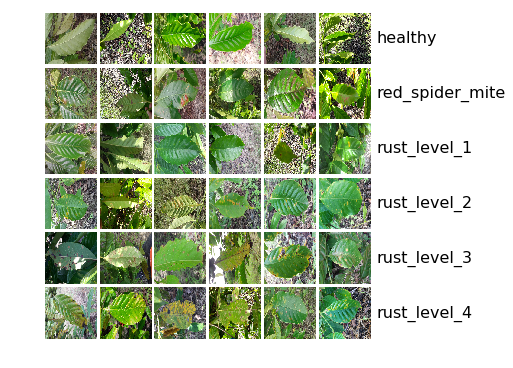

In [0]:
fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
i = 0
for category_id, category in enumerate(CATEGORIES):
    for filepath in train[train['category'] == category]['file'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (224, 224))
        ax.imshow(img / 255.)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();

In [0]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

In [0]:
def visualize_scatter_with_images(X_2d_data, images, figsize=(45,45), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()

In [0]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color= plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.8,
                    label=id_to_label_dict[label_id])
    plt.legend(loc='best')

In [0]:
images = []
labels = []

for class_folder_name in os.listdir(train_dir):
    class_folder_path = os.path.join(train_dir, class_folder_name)
    for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (150, 150))
        image = segment_plant(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (45,45))
        
        image = image.flatten()
        
        images.append(image)
        labels.append(class_folder_name)
        
images = np.array(images)
labels = np.array(labels)

In [0]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [0]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [0]:
images_scaled = StandardScaler().fit_transform(images)

In [0]:
images_scaled.shape

(1406, 2025)

In [0]:
label_ids.shape

(1406,)

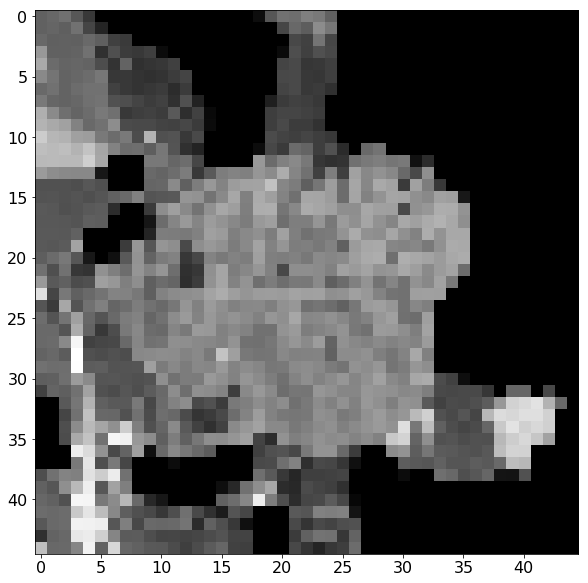

In [0]:
plt.imshow(np.reshape(images[734], (45,45)), cmap="gray")

In [0]:
pca = PCA(n_components=180)
pca_result = pca.fit_transform(images_scaled)

In [0]:
pca_result.shape

(1406, 180)

In [0]:
tsne = TSNE(n_components=2, perplexity=40.0)

In [0]:
tsne_result = tsne.fit_transform(pca_result)

In [0]:
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

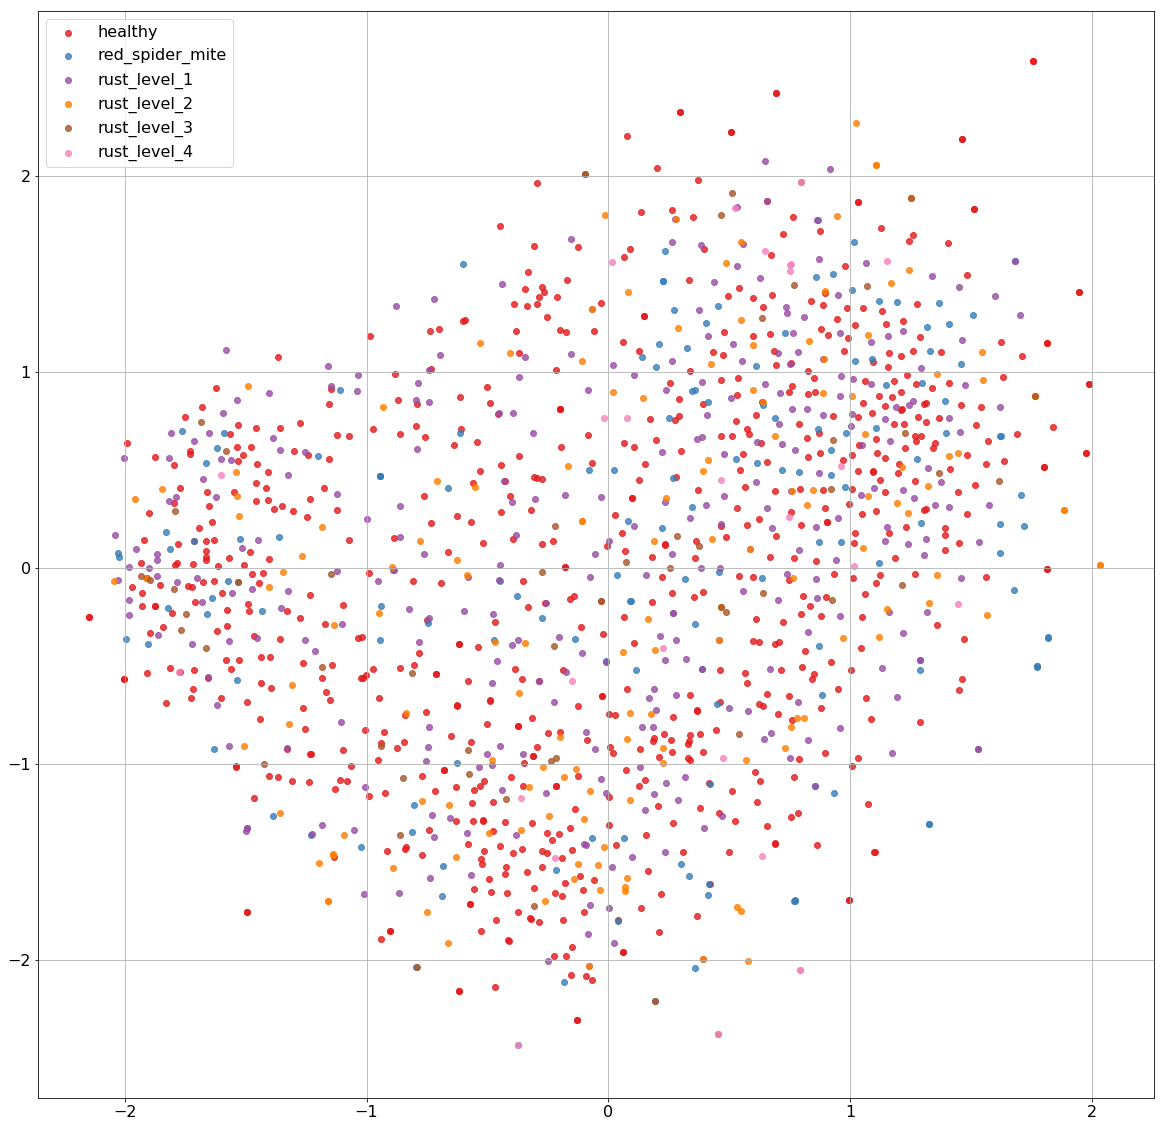

In [0]:
visualize_scatter(tsne_result_scaled, label_ids)

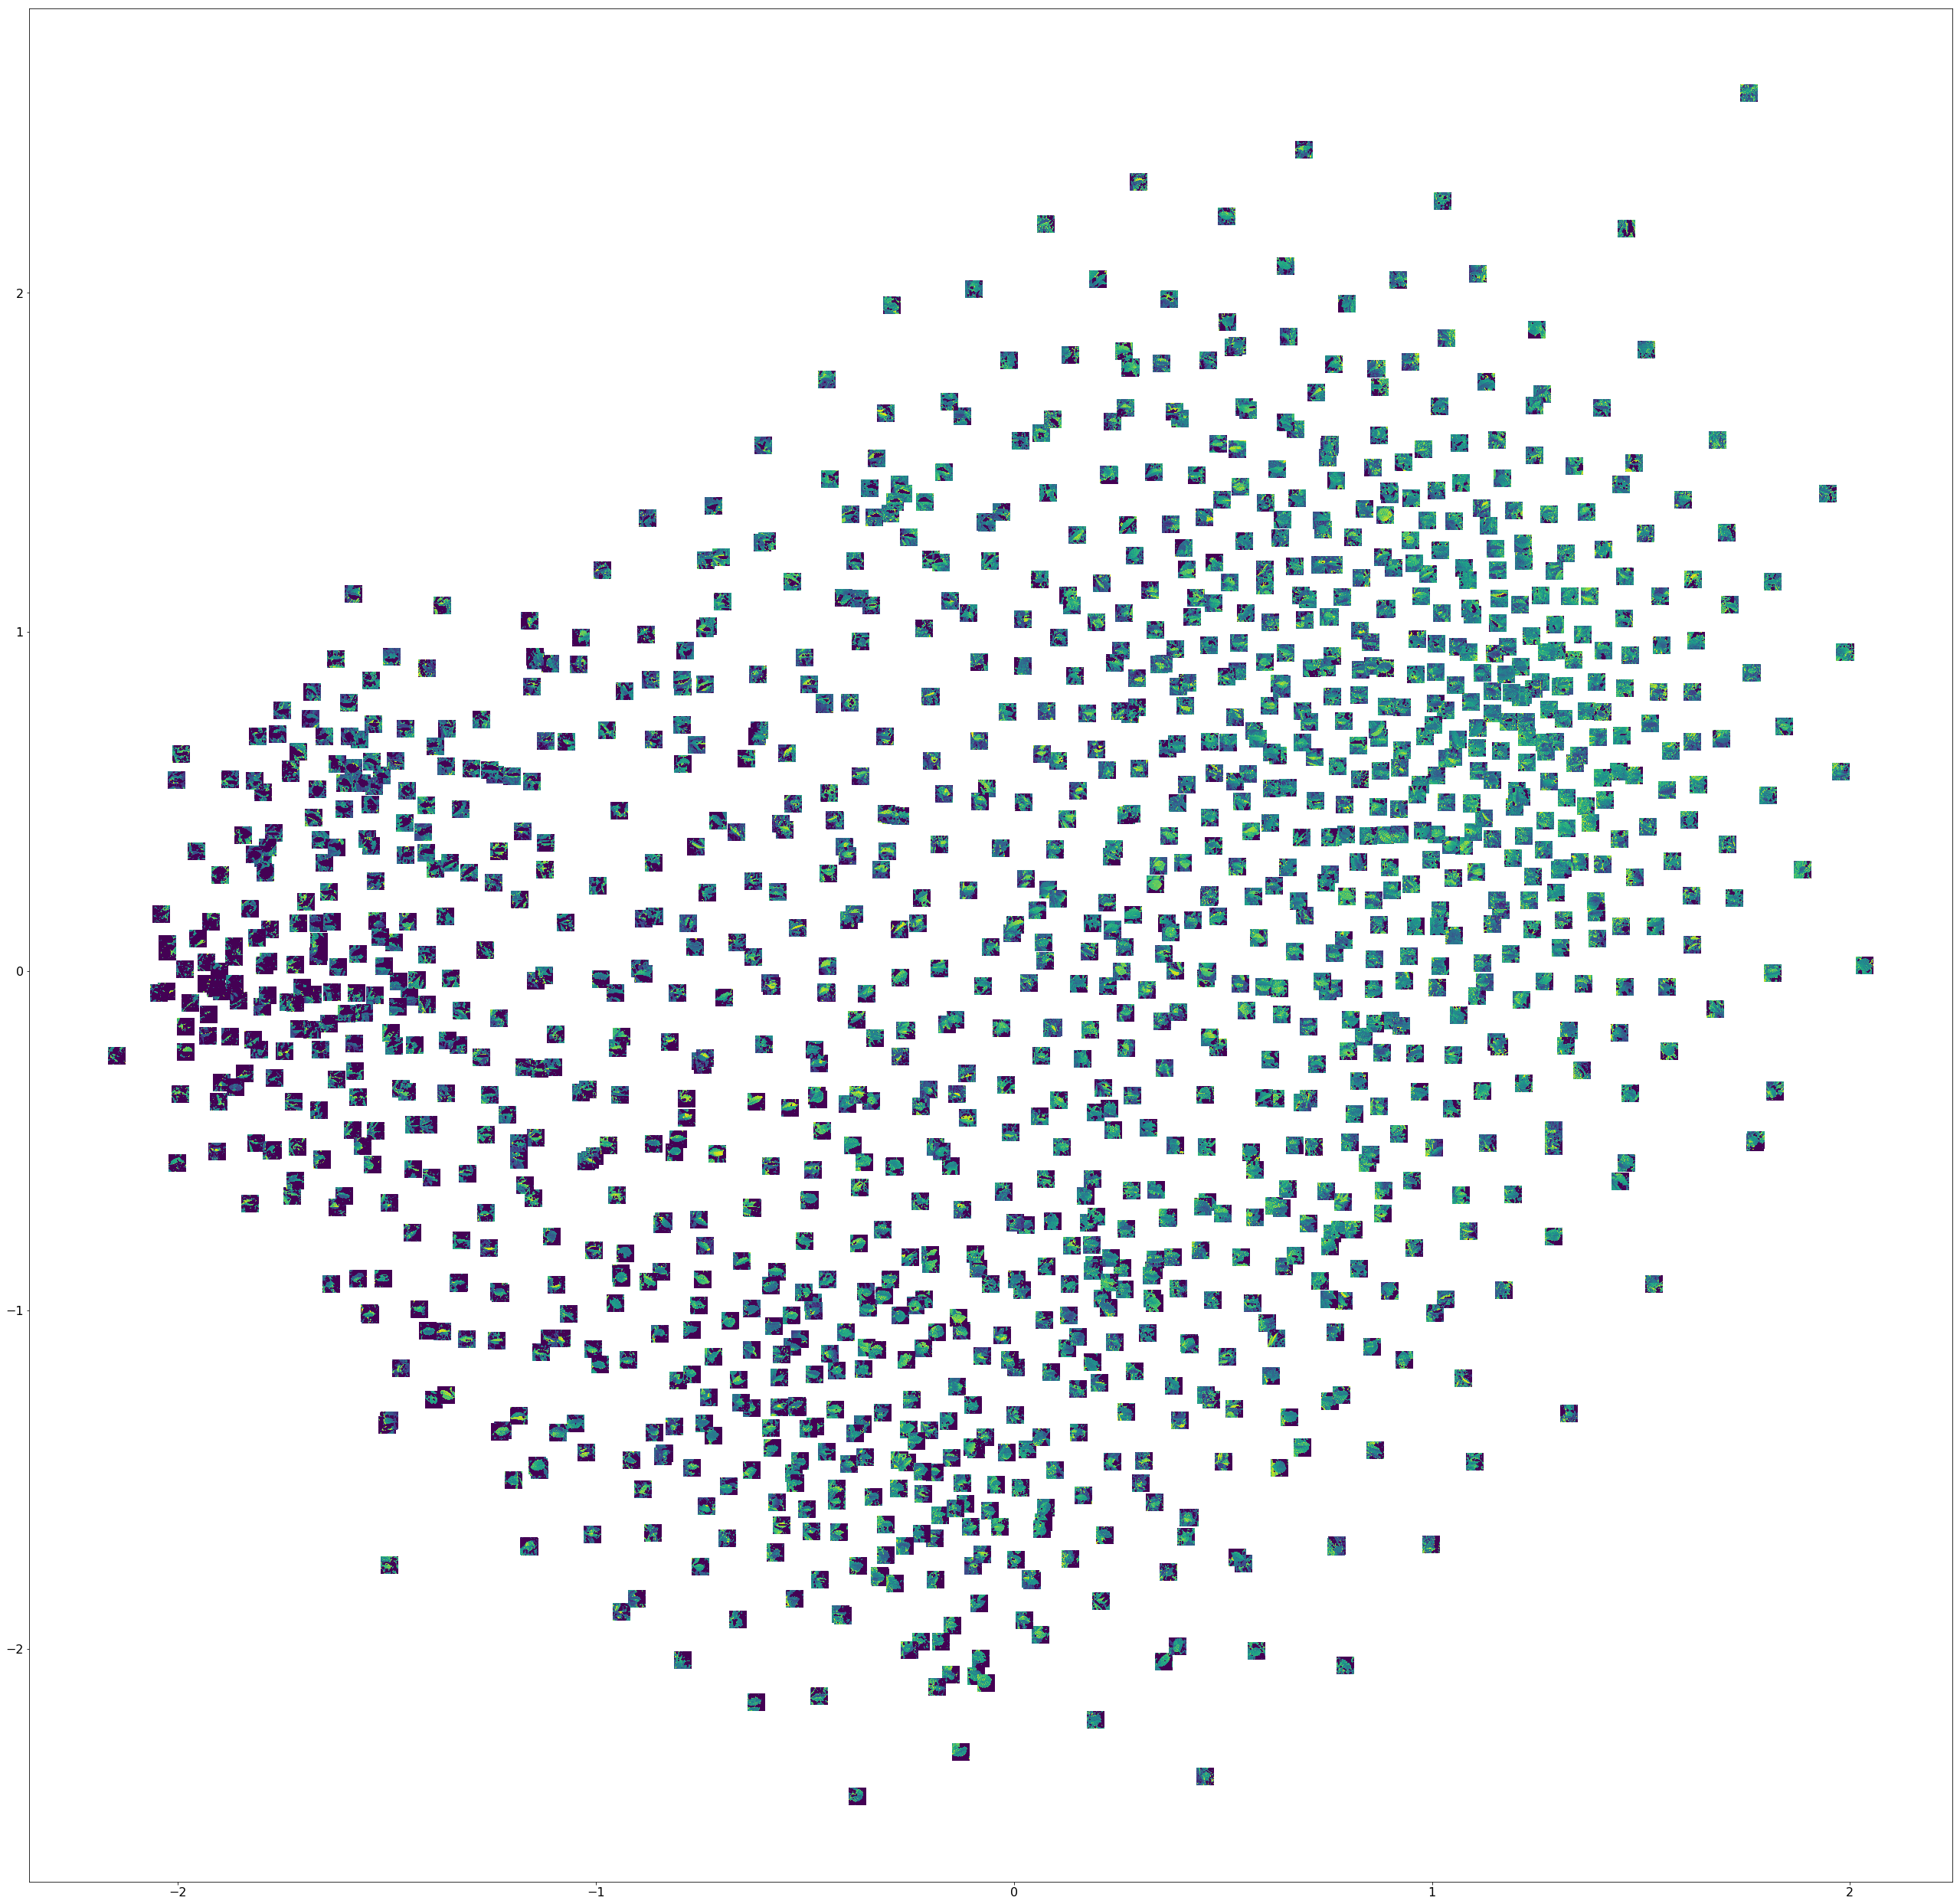

In [0]:
visualize_scatter_with_images(tsne_result_scaled, images = [np.reshape(i, (45,45)) for i in images], image_zoom=0.5)

#TSNE with animation

In [0]:
tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

(-2.5, 2.5)

(-2.5, 2.5)

(-2.5, 2.5)

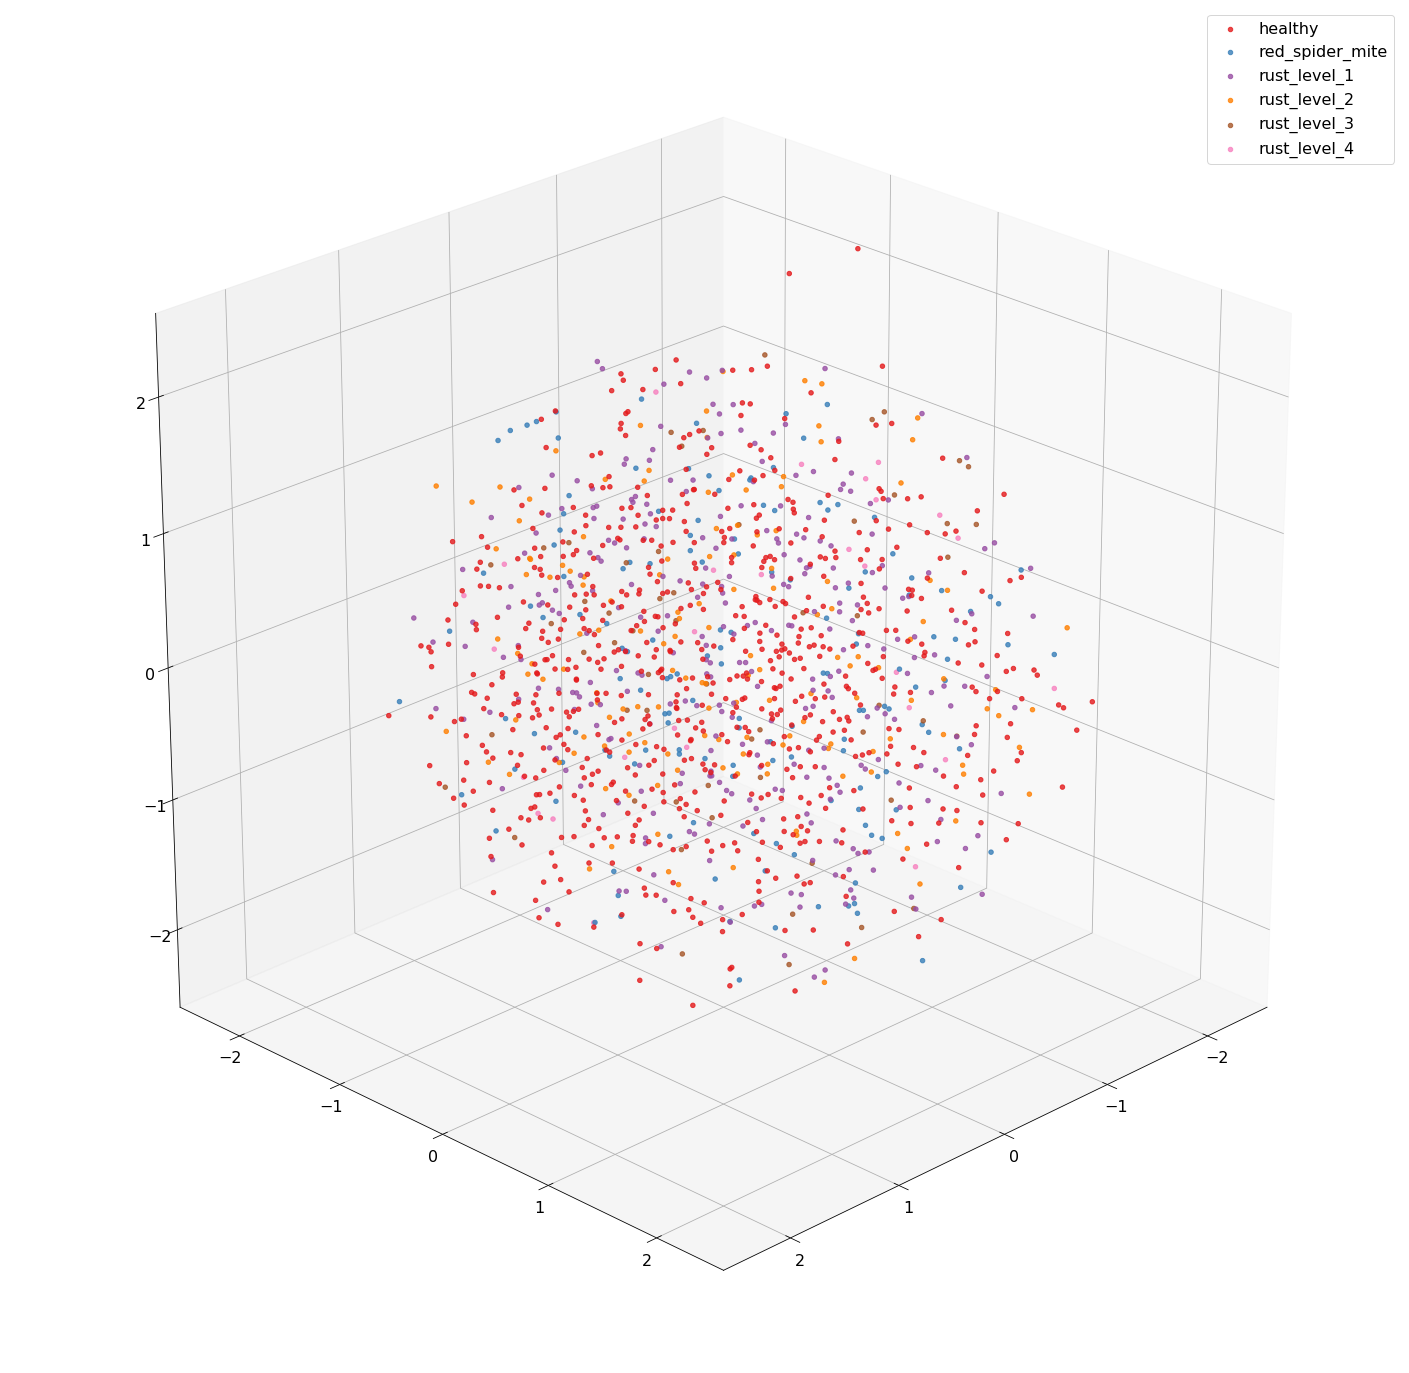

In [0]:
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111,projection='3d')

plt.grid()
    
nb_classes = len(np.unique(label_ids))
    
for label_id in np.unique(label_ids):
    ax.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],
                tsne_result_scaled[np.where(label_ids == label_id), 1],
                tsne_result_scaled[np.where(label_ids == label_id), 2],
                alpha=0.8,
                color= plt.cm.Set1(label_id / float(nb_classes)),
                marker='o',
                label=id_to_label_dict[label_id])
ax.legend(loc='best')
ax.view_init(25, 45)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

In [0]:
anim = animation.FuncAnimation(fig, lambda frame_number: ax.view_init(30, 4 * frame_number), interval=75, frames=90)

In [0]:
plot_3d_animation_filename = 'animation.gif'
anim.save(plot_3d_animation_filename, writer='imagemagick')

MovieWriter imagemagick unavailable. Trying to use pillow instead.


In [0]:
import io
import base64
from IPython.display import HTML

video = io.open(plot_3d_animation_filename, 'r+b').read()
# HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(base64.b64encode(video).decode('ascii')))